<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_1/Concepts_of_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# any packages used should be imported at the top of your notebook
import pandas as pd
import numpy as np
from datetime import datetime

# Chapter 1: Concepts of Measurement
## Importing Data

Anytime we read in data, we want to ensure that our analysis is reproducible. Therefore we should link directly to the location of our data so anyone else can refer to it and replicate our analysis.

**DO:** Make sure when you download data, you right click and copy the link address. 

**DO NOT:** download the data locally to your computer and save in a folder to read in as 'data'. 

Let's practice with downloading Zillow's Home Values Forecast data from https://www.zillow.com/research/data/, make sure to use the 'Copy Link Address'


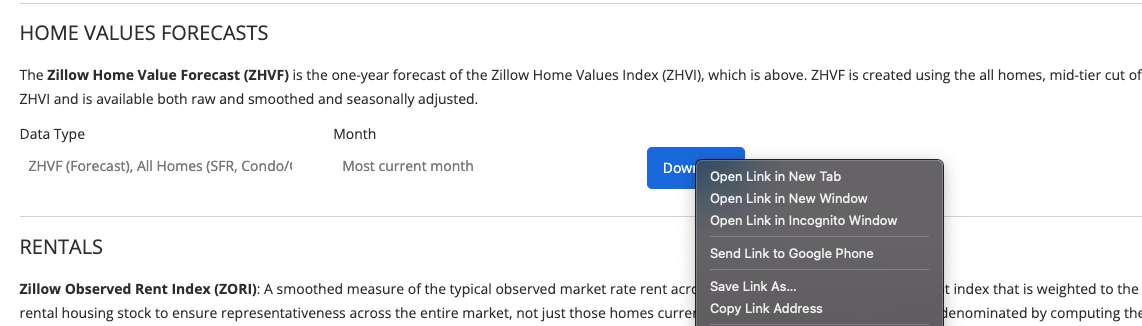

We use pandas package to read in data, if the file is a csv, we use pd.read_csv and then paste the url link

In [ ]:
# read in from URL
df = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvf/zhvf_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1641224930")

It is usually helpful to look at the data to see what columns are available and the type of data we are working with. A helpful function is the .head() and .tail() which show the first 5 rows and the bottom 5 rows of a dataframe.

In [ ]:
df.head()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Country,United States,NaN,NaN,NaN,2022-11-30,14.3
1,Msa,"Aberdeen, SD",SD,NaN,NaN,2022-11-30,8.2
2,Msa,"Aberdeen, WA",WA,NaN,NaN,2022-11-30,20.9
3,Msa,"Abilene, TX",TX,NaN,NaN,2022-11-30,12.1
4,Msa,"Ada, OK",OK,NaN,NaN,2022-11-30,12.3


In [ ]:
df.tail()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
23471,Zip,99712,AK,Fairbanks North Star Borough,Fairbanks,2022-11-30,9.0
23472,Zip,99714,AK,Fairbanks North Star Borough,Salcha,2022-11-30,7.2
23473,Zip,99801,AK,Juneau Borough,Juneau,2022-11-30,8.6
23474,Zip,99824,AK,Juneau Borough,Juneau,2022-11-30,8.4
23475,Zip,99901,AK,Ketchikan Gateway Borough,Ketchikan,2022-11-30,9.0


To download data from yahoo finance, we can use the package [yfinance](https://pypi.org/project/yfinance/) which was built to allow Python to downlad market data. This package is not pre-installed in google collab's environment, so we must first install it using [pip](https://realpython.com/what-is-pip/) (the standard package manager for Python). We can use the terminal command from within a notebook shown below:

In [ ]:
# try to install
import yfinance as yf

In [ ]:
# use pip to install
! pip install yfinance

     |████████████████████████████████| 6.4 MB 47.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Great! Now we can download time series data about the stock price. Let's practice with Microsoft's stock price from the last year.

In [ ]:
# download data from yahoo finance

msft_df = yf.download('MSFT', 
                      start='2021-01-01', 
                      end='2022-01-01', 
                      progress=False)
msft_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,215.880432,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,216.088669,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,210.485626,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,216.475433,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,217.794373,22956200


There are a lot more functions and features that are included with this package, a neat tutorial can be found here: https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4 

Towards Data Science on Medium has great resources, another site that should become familiar with is https://stackoverflow.com/, knowing how to ask a coding question is the key! With practice this skill will naturally develop.

## Data Preparation

### Counting and Sorting

A manager at a company that matches independent gig workers to a job based on the industry has employee data from their most recent work engagement. 

1. We want to find the number of missing observations for the Wage, Industry, and Job variables. Since the data might be incomplete due to the short-term nature of employment. 

2. What is the number of employees that worked in the automotive industry

3. How many employees earned more than $30 per hour

4. How many employees work in the automotive industry and earn more than $30 per hour?

5. What is the hourly wage of the lowest and highest paid employees at the company as a whole?

5. What is the hourly wage of the lowest and highest paid accountants who work in the automotive or tech industry?


Use pandas read excel if the file is an xlsx. All files from the textbook can be imported this way, where the name is the specified sheet name to read from.

In [ ]:
# import data
gig = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch01_Data_Files.xlsx",
                    sheet_name="Gig")

In [ ]:
gig.head()

,EmployeeID,Wage,Industry,Job
0,1,32.81,Construction,Analyst
1,2,46.00,Automotive,Engineer
2,3,43.13,Construction,Sales Rep
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant


In [ ]:
# a great way to see how big a dataframe is, use the shape function
gig.shape

(604, 4)

The shape function shows us how many rows and columns are in a dataset, the first number says there are 604 rows, and the second number is 4 columns.

How many missing observations? We can use the isnull() function or isna() from pandas. For now we can consider these as equivalent.

In [ ]:
# see how many are missing by taking the sum
gig.isna().sum()

EmployeeID     0
Wage           0
Industry      10
Job           16
dtype: int64

We see that 10 rows are missing for Industry and Job is missing 16. 

### How to Handle Missing Data

From [Statistics in a Nutshell](https://theswissbay.ch/pdf/Gentoomen%20Library/Maths/Statistics/OReilly.Statistics.in.a.Nutshell.A.Desktop.Quick.Reference.Aug.2008.pdf), chapter 3: Data Management



1. Make an extra effort to collect the missing data by following up with the
source, which solves the problem by making the missing data no longer
missing.
2. Consider a different analytical design, such as a multilevel model rather than
a classic repeated-measures model.
3. **Impute values for the missing data** using maximum likelihood methods such
as those available in the SPSS MVA module, or use multiple imputation in
SAS PROC MI to generate a distribution for the missing value and select a
value for each missing case.
4. **Include a dummy (0, 1) variable** in your analysis that indicates that data was
missing, along with an imputed value replacing the missing data.
5. **Drop the cases** or variables with large amounts of missing data from the analysis (only feasible if the problem is confined to a small percentage of cases
and/or variables that are not central to your analysis, and may introduce bias
if the data is not MCAR).
6. Conditional imputation: use available values to impute missing values (not
recommended, as it may result in an underestimate of variance).
7. Simple imputation: substitute a value such as the population mean for the
missing value (not recommended, as it nearly always results in an extreme
underestimate of variance).


TLDR:

1. Impute the missing datapoint
2. Drop the missing datapoint
3. Replace with a dummy or leave as np.nan()



In [ ]:
# let's see where the Industry data is missing

gig[gig['Industry'].isna()]

,EmployeeID,Wage,Industry,Job
23,24,42.58,NaN,Sales Rep
138,139,42.18,NaN,Engineer
360,361,31.33,NaN,Other
377,378,48.09,NaN,Other
440,441,32.35,NaN,Accountant
445,446,30.76,NaN,Accountant
478,479,42.85,NaN,Consultant
499,500,43.13,NaN,Sales Rep
530,531,43.13,NaN,Engineer
564,565,38.98,NaN,Accountant


In [ ]:
# let's see where the Job data is missing

gig[gig['Job'].isna()]

,EmployeeID,Wage,Industry,Job
20,21,49.59,Construction,NaN
57,58,44.90,Construction,NaN
65,66,26.09,Construction,NaN
88,89,41.93,Construction,NaN
107,108,43.12,Construction,NaN
174,175,48.80,Automotive,NaN
211,212,30.74,Construction,NaN
252,253,44.90,Construction,NaN
290,291,26.09,Construction,NaN
346,347,26.09,Construction,NaN


Because these are categorical variables, rather than numerical, we cannot impute the average or using any other maximum liklihood method without too many assumptions. We can either drop these rows from our analysis, paricularly because it is a small subset of the overall sample. Or we can leave as np.nan() and exclude these rows when we calculate the values we are analyzing when it relates to Industry or Job. We would be more inclined to remove these rows if we had guidance to assume these data points are not reliable.

**Whatever approach you take when dealing with missing data, you must explain your rationale**

#### What is the number of employees that worked in the automotive industry?

We will filter to the column with this value using pandas to slice, similar when we looked for missing data

In [ ]:
# filter to rows where Industry equals Automotive
gig[gig['Industry'] == 'Automotive']

,EmployeeID,Wage,Industry,Job
1,2,46.00,Automotive,Engineer
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant
10,11,28.00,Automotive,Engineer
15,16,24.76,Automotive,Programmer
...,...,...,...,...
592,593,48.98,Automotive,NaN
595,596,45.68,Automotive,Engineer
598,599,49.84,Automotive,Engineer
599,600,41.26,Automotive,Accountant


The notebook environment limits how many rows of a table we can see by default, our code returned the entire dataset that fit our filter, but it is truncated in the middle (as represented by the ... ellipses). 

Therefore, we can use the .shape function to get the number of rows.

In [ ]:
gig[gig['Industry'] == 'Automotive'].shape

(190, 4)

So our answer is 190 employees work in the Automotive sector.


If we wanted to see all the unique types of industries, there is a function for that.

In [ ]:
gig['Industry'].unique()

array(['Construction', 'Automotive', nan, 'Tech'], dtype=object)

Let's see what Industry appears the most? We can use the handy function .value_counts()

In [ ]:
gig['Industry'].value_counts()

Construction    366
Automotive      190
Tech             38
Name: Industry, dtype: int64

This shows us the count of each value, where 366 are Construction and 38 are in Tech. Notice how we don't see the missing values counted. This makes intuitive sense because they are technically not a number and therefore cannot be counted.

#### How many employees earned more than $30 per hour?

In [ ]:
# filter to rows where wage is greater than 30
gig[gig['Wage'] > 30].shape

(536, 4)

We can slice this tuple by calling just the first index item .shape[0] for the rows.

We can also use a print function with the f in front of the string and curly {} brackets to print any functional code as a string. See below.

**For any homework question, the answer must be printed in this format!**

In [ ]:
print(f'There are {gig[gig["Wage"] > 30].shape[0]} employees that earn over 30$ per hour')

There are 536 employees that earn over 30$ per hour


In [ ]:
# we can also calcualte less than, or equal to.

# less than or equal to 30
gig[gig['Wage'] <= 30].shape

(68, 4)

In [ ]:
# equal to 41
gig[gig['Wage'] == 41].shape

(3, 4)

In [ ]:
# use the ! for not equal to
gig[gig['Wage'] != 41].shape

(601, 4)

#### How many employees work in the automotive industry and earn more than $30 per hour?

In [ ]:
# filter to rows where wage is greater than 30 and industry is equal to Automotive
gig[(gig['Wage'] > 30) & (gig['Industry'] == 'Automotive')].shape

(181, 4)

In [ ]:
# can store the answer as a variable to use as a string.
answer4 = gig[(gig['Wage'] > 30) & (gig['Industry'] == 'Automotive')].shape[0]
answer4

181

In [ ]:
print(f'There are {answer4} employees that earn over 30$ per hour and work in the automotive industry')

There are 181 employees that earn over 30$ per hour and work in the automotive industry


#### What is the hourly wage of the lowest and highest paid employees at the company as a whole?

There are many ways we can calculate this. We can use the describe function, calculate the min and max, or sort by.

In [ ]:
# describe
gig.describe()

,EmployeeID,Wage
count,604.000000,604.000000
mean,302.500000,40.082798
std,174.504059,7.093731
min,1.000000,24.280000
25%,151.750000,34.190000
50%,302.500000,41.880000
75%,453.250000,45.865000
max,604.000000,51.000000


We see the min and max value for any numeric data.

In [ ]:
# use min and max
gig.Wage.min(), gig.Wage.max()

(24.28, 51.0)

In [ ]:
# sort by Wage, show lowest 5
gig.sort_values(by='Wage').head()

,EmployeeID,Wage,Industry,Job
466,467,24.28,Construction,Engineer
546,547,24.28,Construction,Sales Rep
579,580,24.28,Construction,Accountant
558,559,24.42,Construction,Engineer
220,221,24.76,Automotive,Programmer


In [ ]:
# sort by Wage, show top 5 with the ascending parameter = False
gig.sort_values(by='Wage', ascending=False).head()

,EmployeeID,Wage,Industry,Job
109,110,51.00,Construction,Other
78,79,50.00,Automotive,Engineer
347,348,49.91,Construction,Accountant
372,373,49.91,Construction,Accountant
598,599,49.84,Automotive,Engineer


In [ ]:
print(f'The minimum value is ${gig.Wage.min()} per hour and the maximum value is ${gig.Wage.max()}')

The minimum value is $24.28 per hour and the maximum value is $51.0


#### What is the hourly wage of the lowest and highest paid accountants who work in the automotive and tech industry?

In [ ]:
# filter to industry of selection, instead of & we will use | (which means OR)
industry_sub = gig[(gig['Industry'] == 'Automotive') | (gig['Industry'] == 'Tech')]

Notice how nothing was returned? This happened because we saved this subset to a new variable. We can now filter this subset further by only looking for Accountants as the job.

In [ ]:
industry_sub = industry_sub[industry_sub['Job'] == 'Accountant']

In [ ]:
# 35 total fit our parameters
industry_sub.shape

(35, 4)

In [ ]:
# we can reuse code with the new dataframe :)
print(f'The minimum value is ${industry_sub.Wage.min()} per hour and the maximum \
value is ${industry_sub.Wage.max()}  \n for employees that are accountants and work in the Automotive or Tech industry')

The minimum value is $28.74 per hour and the maximum value is $49.49  
 for employees that are accountants and work in the Automotive or Tech industry


Notice that \n can be used to create a line break in your print statement. 

## Subsetting

Case study looks at customer demographic data. For analysis we want to identify college-educated millenial customers in the data file. Then create a subset of female and male college-educated millenial customers and provide a summary of the results.

In [ ]:
# import data
customers = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch01_Data_Files.xlsx",
                    sheet_name="Customers")

In [ ]:
customers.head()

,CustID,Sex,Race,BirthDate,College,HHSize,Income,Spending,Orders,Channel
0,1530016,Female,Black,1986-12-16,Yes,5,53000,241,3,SM
1,1531136,Male,White,1993-05-09,Yes,5,94000,843,12,TV
2,1532160,Male,Black,1966-05-22,Yes,2,64000,719,9,TV
3,1532307,Male,White,1964-09-16,Yes,4,60000,582,13,SM
4,1532356,Female,Hispanic,1964-07-15,No,5,47000,845,7,Web


In [ ]:
customers.shape

(200, 10)

Let's see how many missing data points there are.

In [ ]:
customers.isna().sum()

CustID       0
Sex          0
Race         0
BirthDate    0
College      0
HHSize       0
Income       0
Spending     0
Orders       0
Channel      0
dtype: int64

In [ ]:
customers.College.value_counts()

Yes    168
No      32
Name: College, dtype: int64

#### Identify college-educated millenial customers in the data file.

In [ ]:
# filter to college == Yes

college = customers[customers['College'] == 'Yes']
college.shape

(168, 10)

We don't have any age variable, but we do have the birth date, let's convert this to an age, by subtracting from today's date.

In [ ]:
todays_date = datetime.today()
todays_date

datetime.datetime(2022, 1, 3, 19, 26, 33, 571204)

In [ ]:
# lets write a function to subtract the dates and get the number of days

def days_between(d1, d2):
  """
  Function to calculate the number of years between two dates
  """
  # take the absolute difference of days
  days_between_dates = abs((d2 - d1).days)
  # divide by number of days in a year, round to a whole number
  return round(days_between_dates/365)

In [ ]:
college.BirthDate.head()[0]

Timestamp('1986-12-16 00:00:00')

In [ ]:
days_between(college.BirthDate.head()[0], todays_date)

35

Someone born in 1986 would be 35 years old today. Now we can create a new column and apply this function.

In [ ]:
# set a new variable as years old
college['Age'] = college['BirthDate'].apply(lambda x: days_between(x, todays_date))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# using the indexing method
college.loc[:,'Age'] = college['BirthDate'].apply(lambda x: days_between(x, todays_date))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
college.head()

,CustID,Sex,Race,BirthDate,College,HHSize,Income,Spending,Orders,Channel,Age
0,1530016,Female,Black,1986-12-16,Yes,5,53000,241,3,SM,35
1,1531136,Male,White,1993-05-09,Yes,5,94000,843,12,TV,29
2,1532160,Male,Black,1966-05-22,Yes,2,64000,719,9,TV,56
3,1532307,Male,White,1964-09-16,Yes,4,60000,582,13,SM,57
5,1532387,Male,White,1957-08-27,Yes,2,67000,452,9,SM,64


In [ ]:
# millenials are defined as 25-40 years old
college_millenial = college[(college['Age'] >= 25) | (college['Age'] <= 40)]

In [ ]:
# see what type of data the birthdate is
college["BirthDate"].dtype

dtype('<M8[ns]')

In [ ]:
# we could have also just used the birthday column instead

# convert the encoding to datetime so we can filter
college["BirthDate"] = pd.to_datetime(college["BirthDate"]).dt.date

# create lower cuttoff in same encoding
lower_cutoff = pd.to_datetime('1981-01-01').date()

higher_cutoff = pd.to_datetime('1996-12-31').date()

# filter
college_millenial_1 = college[(college['BirthDate'] >= lower_cutoff) | (college['BirthDate'] <= higher_cutoff)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# lets check to make sure they are the same between methods
college_millenial_1.shape[0] == college_millenial.shape[0]

True

### Create subset of Female Educated Millennials and Male Educated Millenials

In [ ]:
male_col_mil = college_millenial[college_millenial['Sex'] == 'Male']
female_col_mil = college_millenial[college_millenial['Sex'] == 'Female']

In [ ]:
male_col_mil.shape, female_col_mil.shape

((107, 11), (61, 11))

In [ ]:
print(f'There are {male_col_mil.shape[0]} male college educated millenials')

There are 107 male college educated millenials


In [ ]:
print(f'There are {female_col_mil.shape[0]} male college educated millenials')

There are 61 male college educated millenials


What if we wanted to analyze the average income, spending, orders and age between male and female? We can use the groupby function.

In [ ]:
# see all the columns available
college_millenial.columns

Index(['CustID', 'Sex', 'Race', 'BirthDate', 'College', 'HHSize', 'Income',
       'Spending', 'Orders', 'Channel', 'Age'],
      dtype='object')

In [ ]:
# filter to columns of interest
numerical_cols = [ 'Income', 'Spending', 'Orders',  'Age']

In [ ]:
# use groupby to see difference between male and female

college_millenial.groupby('Sex')[numerical_cols].mean()

,Income,Spending,Orders,Age
Sex,,,,
Female,64377.04918,716.311475,11.475410,43.163934
Male,81915.88785,631.542056,10.233645,46.084112
